In [1]:
from keras.datasets import mnist
from keras import models
from keras import layers
from keras import utils
import numpy as np

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images.shape, test_images.shape, train_labels.shape, test_labels.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [3]:
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

train_labels = utils.to_categorical(train_labels)
test_labels = utils.to_categorical(test_labels)
train_images.shape, test_images.shape, train_labels.shape, test_labels.shape

((60000, 28, 28), (10000, 28, 28), (60000, 10), (10000, 10))

In [4]:
train_images = train_images.reshape((len(train_images), np.prod(train_images.shape[1:])))
test_images = test_images.reshape((len(test_images), np.prod(test_images.shape[1:])))
train_images.shape, test_images.shape, train_labels.shape, test_labels.shape

((60000, 784), (10000, 784), (60000, 10), (10000, 10))

In [7]:
from SAE_model import SAE3

In [8]:
SAE3_model = SAE3(input_dim=784, latent_dim=[150, 50, 65])
SAE3_model.load_weights('models/SAE3.h5')

d:\Python\Python310\lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [9]:
train_images = SAE3_model.encode(train_images)
test_images = SAE3_model.encode(test_images)
train_images.shape, test_images.shape, train_labels.shape, test_labels.shape

(TensorShape([60000, 65]), TensorShape([10000, 65]), (60000, 10), (10000, 10))

In [10]:
from classifer_model import Softmax_Classifer
from keras import optimizers
from keras import losses
from keras import metrics

In [11]:
Softmax_Classifer_model = Softmax_Classifer(input_dim=65, output_dim=10)
Softmax_Classifer_model.compile(
    optimizer=optimizers.Adam(),
    loss=losses.CategoricalCrossentropy(),
    metrics=[metrics.CategoricalAccuracy()]
)

In [12]:
history = Softmax_Classifer_model.fit(train_images, train_labels, epochs=150, batch_size=128, validation_data=(test_images, test_labels))

Epoch 1/150
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 990us/step - categorical_accuracy: 0.3648 - loss: 1.9480 - val_categorical_accuracy: 0.7460 - val_loss: 0.9534
Epoch 2/150
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 755us/step - categorical_accuracy: 0.7537 - loss: 0.8941 - val_categorical_accuracy: 0.7837 - val_loss: 0.7302
Epoch 3/150
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 771us/step - categorical_accuracy: 0.7810 - loss: 0.7255 - val_categorical_accuracy: 0.7972 - val_loss: 0.6501
Epoch 4/150
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 721us/step - categorical_accuracy: 0.7917 - loss: 0.6551 - val_categorical_accuracy: 0.8049 - val_loss: 0.6078
Epoch 5/150
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 735us/step - categorical_accuracy: 0.8016 - loss: 0.6160 - val_categorical_accuracy: 0.8116 - val_loss: 0.5825
Epoch 6/150
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 738us/step - categorical_accuracy: 0.8061 - loss: 0.5939 - val_categorical_accuracy: 0.8163 - val_loss: 0.5648
Epoch 7/150
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 736us/step - categorical_a

In [13]:
Softmax_Classifer_model.save('models/SAE3_softmax.h5')

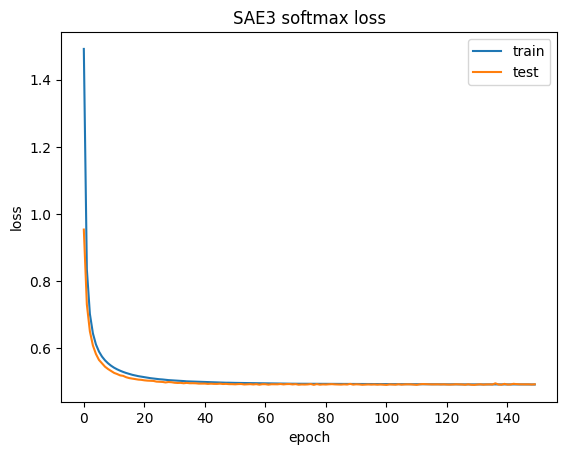

In [14]:
import matplotlib.pyplot as plt


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('SAE3 softmax loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()